# EXPLORATORY DATA ANALYSIS 

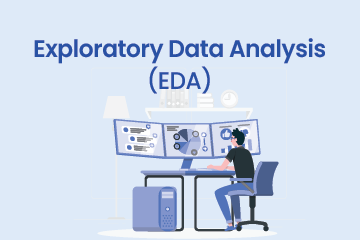

This Jupyter Notebook contains the code and analysis for Exploratory Data Analysis (EDA) project on Indeed job listings.  It includes data cleaning [see previous notebook](https://github.com/Adesuaayo/Master-Data-Cleaning-in-Python-A-Hands-On-Project), visualizations, and insights into salary trends, location distribution, and in-demand skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
df = pd.read_csv(r"cleaned_job_data.csv", parse_dates = ["Date Posted"])

df.head()

,Title,Company,Location,Salary,Job Type,Date Posted,Summary
0,Transportation Analyst,ExxonMobil,Lagos,200000.0,Unknown,2024-03-24,Intermediate proficiency with Tableau or other...
1,QA Tester - Intern,mDoc Healthcare,Lagos,110000.0,Contract,2024-03-25,Advanced knowledge of data security and encryp...
2,Data Analyst - Healthcare,eMedicStore,Lagos,200000.0,Full-time,2024-03-26,Implement new data analysis methodologies and ...
3,Data Analyst,GVA Partners,Lagos,200000.0,Full-time,2024-03-26,Minimum of years working experience as a data ...
4,HR Analyst,Jobrole Consulting Limited,Ikeja,175000.0,Full-time,2024-03-29,Analyze and interpret data to generate actiona...


In [3]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        203 non-null    object        
 1   Company      203 non-null    object        
 2   Location     203 non-null    object        
 3   Salary       203 non-null    float64       
 4   Job Type     203 non-null    object        
 5   Date Posted  203 non-null    datetime64[ns]
 6   Summary      203 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 11.2+ KB


#### Key Questions to guide our EDA :

1. What are the average, minimum, and maximum salaries offered?
2. How is the distribution of salary visualized through a histogram?
3. What is the distribution of job types?
4. What is the distribution of locations?
5. How does the mean salary vary across different job types, locations?
6. What are the most in-demand skills for these jobs?


####  1. What are the average, minimum, and maximum salaries offered?

In [5]:
# Summary statistics for Salary column
salary_stats = df["Salary"].describe().apply(lambda x: round(x, 2))
print("Summary Statistics for Salary:")
print(salary_stats)

Summary Statistics for Salary:
count        203.00
mean      207197.04
std        86575.84
min        70000.00
25%       200000.00
50%       200000.00
75%       200000.00
max      1200000.00
Name: Salary, dtype: float64



* __Mean:__ The average salary is approximately __₦207,197.00__.
* __Minimum (min):__ The lowest salary recorded is __₦70,000.00__.
* __Maximum (max):__ The highest recorded salary is __₦1,200,000.00.__


#### 2. How is the distribution of salary visualized through a histogram?

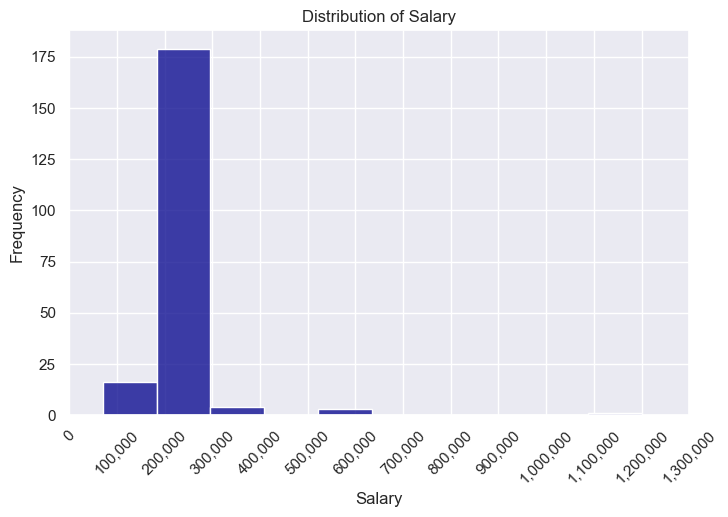

In [6]:
# Visualize the distribution of salary using a histogram

sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Salary', bins=10, kde=False, color='darkblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.xlim(0, 1300000)
# Set y-tick labels for the histogram
plt.xticks(range(0, 1300001, 100000), [f'{i:,}' for i in range(0, 1300001, 100000)])
plt.xticks(rotation=45)
plt.show()

* The histogram provides a visual representation of the distribution of salary values, as shown most of the salary in the dataset falls within the range of __₦200,000.__ 
* The extended tail to the right indicates that there are a few data points with higher salaries, with the maximum salary being __₦1,200,000__
* The skewness of the distribution is evident from the histogram, with more data points clustered towards the lower salary values and fewer data points towards the higher salary values.

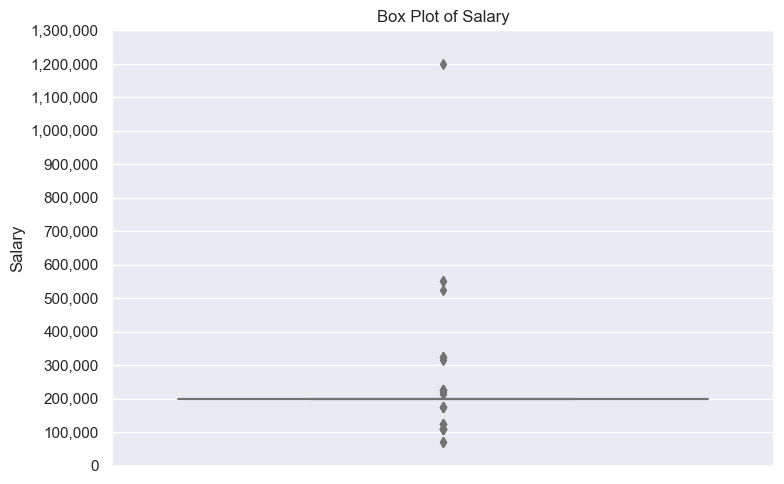

In [7]:
# Box plot of Salary
plt.figure(figsize=(8, 5))
sns.boxplot(y='Salary', data=df, color='lightgreen')
plt.title('Box Plot of Salary')
plt.ylabel('Salary')
plt.ylim(0, 1300000)
plt.yticks(range(0, 1300001, 100000), [f'{i:,}' for i in range(0, 1300001, 100000)])
plt.tight_layout()
plt.show()

The small box in the box plot indicates that the majority of the salary data falls within a narrow range around ₦200,000, with the median salary also around that value. This suggests that the salary distribution is relatively concentrated without significant variability. Outliers, which are data points lying beyond the whiskers, are represented as individual points outside the whiskers.
The box plot confirms the findings from the histogram, showing that most salaries are concentrated around the median value, with a few higher salary outliers.

In [8]:
# Count and unique values for Job types columns
job_type_counts = df["Job Type"].value_counts()
print("\nCount of Job Types:")
print(job_type_counts)



Count of Job Types:
Full-time     147
Unknown        31
Permanent      11
Contract       10
Temporary       2
Internship      2
Name: Job Type, dtype: int64


#### 3. What is the distribution of job types?

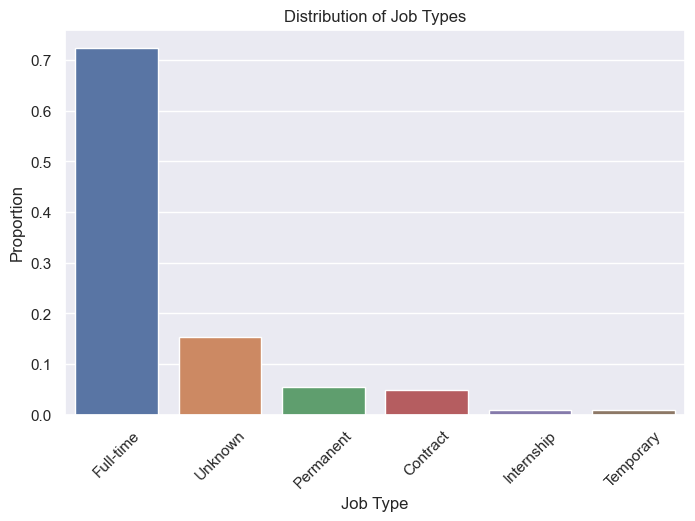

In [9]:
# Plotting the distribution of job types
plt.figure(figsize=(8, 5))
job_type_counts = df['Job Type'].value_counts(normalize=True).sort_values(ascending=False)
sns.barplot(x=job_type_counts.index, y=job_type_counts.values)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


__Frequency of Job Types:__

__Full-time:__ There are 147 job postings that are labeled as full-time positions.

__Unknown:__ There are 31 job postings where the job type is not specified.

__Permanent:__ There are 11 job postings that are labeled as permanent positions.

__Contract:__ There are 10 job postings that are labeled as contract positions.

__Temporary:__ There are 2 job postings that are labeled as temporary positions.

__Internship:__ There are 2 job postings that are labeled as internship positions.

#### 4.What is the distribution of locations?

In [10]:
location_counts = df["Location"].value_counts()
print("\nCount of Locations:")
print(location_counts)


Count of Locations:
Lagos          131
Nigeria         23
Abuja           19
Sokoto           4
Abeokuta         4
Cross River      3
Ikeja            3
Zamfara          2
Ogun             2
Ibadan           2
Benin City       2
Yaba             2
Oyo              1
Plateau          1
Gombe            1
Kebbi            1
Shagamu          1
Osogbo           1
Name: Location, dtype: int64


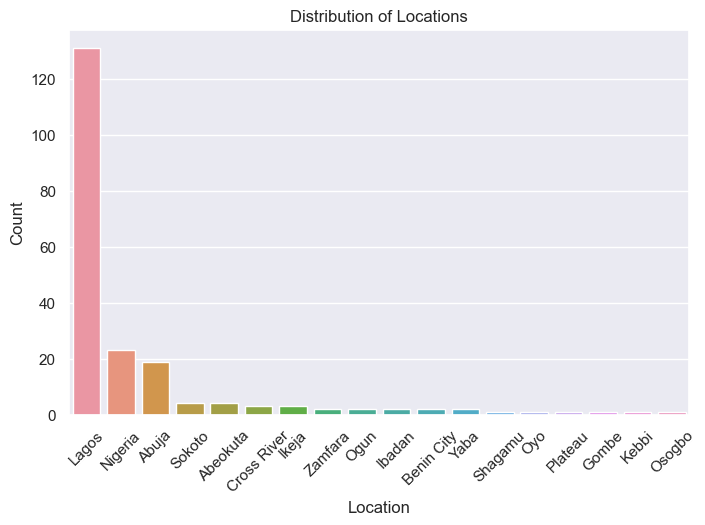

In [11]:
# Plotting the distribution of locations
plt.figure(figsize=(8, 5))
location_counts = df['Location'].value_counts().sort_values(ascending=False)
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

__Frequency of Locations:__

__Lagos:__ The majority of job postings (131) are located in Lagos.

__Nigeria:__ There are 23 job postings that are located in various cities across Nigeria.

__Abuja:__ There are 19 job postings that are located in Abuja.

__Other locations:__ There are smaller numbers of job postings distributed across various cities including Abeokuta, Sokoto, Cross River, Ogun, Zamfara, Benin City, Ibadan, Oyo, Kebbi, Shagamu, Osogbo, Gombe, and Plateau.

As we can see Ikeja, and Yaba are both in Lagos while Shagamu is located in Ogun State, so we need to collapse that.

These frequency provide insights into the distribution of job types and locations in the dataset, which can be useful for understanding the job market landscape and targeting specific areas for analysis or recruitment efforts.

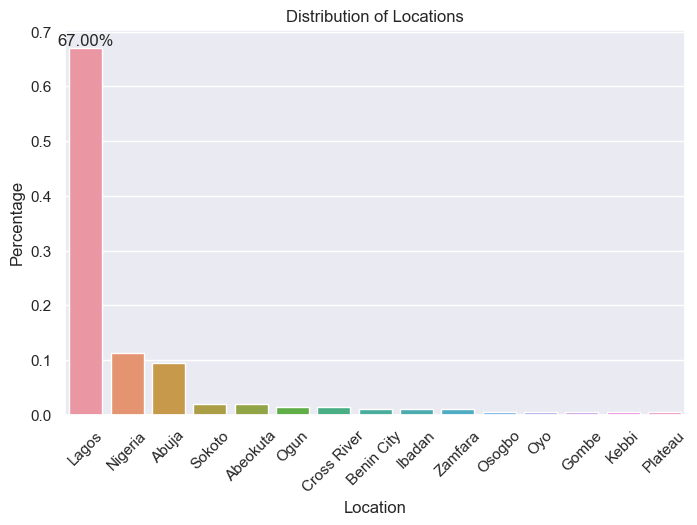

In [12]:
# Combine counts for Ikeja and Yaba under Lagos
df['Location'] = df['Location'].replace({'Ikeja': 'Lagos', 'Yaba': 'Lagos'})

# Combine counts for Shagamu under Ogun
df['Location'] = df['Location'].replace({'Shagamu': 'Ogun'})

# Plotting the updated distribution of locations
plt.figure(figsize=(8, 5))
location_counts = df['Location'].value_counts(normalize=True).sort_values(ascending=False)
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add percentage label to the first bar
plt.text(0, location_counts.values[0], f"{location_counts.values[0]*100:.2f}%", ha='center', va='bottom')

plt.show()


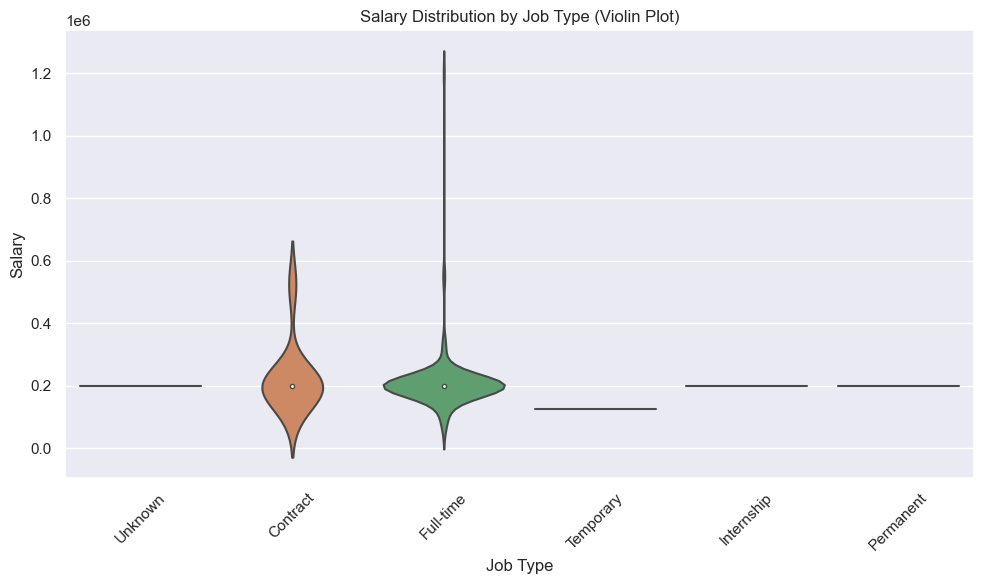

In [13]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Job Type', y='Salary', data=df)
plt.title('Salary Distribution by Job Type (Violin Plot)')
plt.xlabel('Job Type')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5. How does the mean salary vary across different job types

In [14]:
# Group data by job type and calculate summary statistics
salary_stats = df.groupby('Job Type')['Salary'].mean()
salary_stats

Job Type
Contract      223500.000000
Full-time     209360.544218
Internship    200000.000000
Permanent     200000.000000
Temporary     125000.000000
Unknown       200000.000000
Name: Salary, dtype: float64

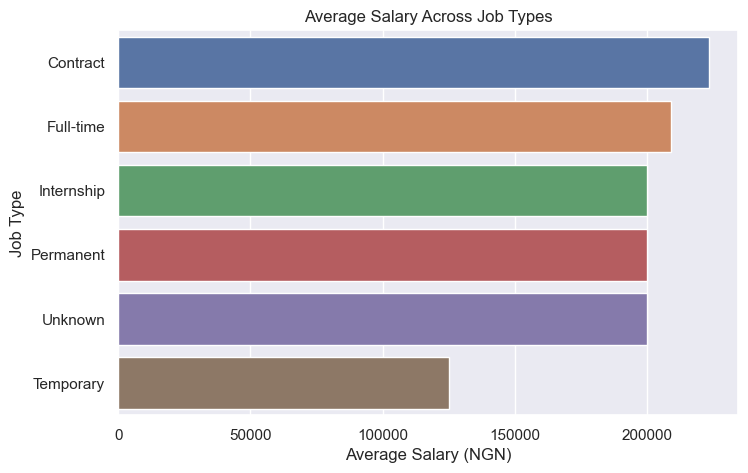

In [15]:
# Bar Plot (Average Salary)
mean_salary = df.groupby('Job Type')['Salary'].mean().reset_index()
# Sorting the DataFrame by mean salary in descending order
mean_salary = mean_salary.sort_values(by='Salary', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Salary', y='Job Type', data=mean_salary)
plt.title('Average Salary Across Job Types')
plt.xlabel('Average Salary (NGN)')
plt.ylabel('Job Type')
plt.show()

From the analysis and visualization above, it is evident that the mean salary varies across different job types. Contract positions tend to have the highest mean salary at __₦223,500__, followed by full-time positions at __₦209,360__. On the other hand, temporary positions have the lowest mean salary at __₦125,000__

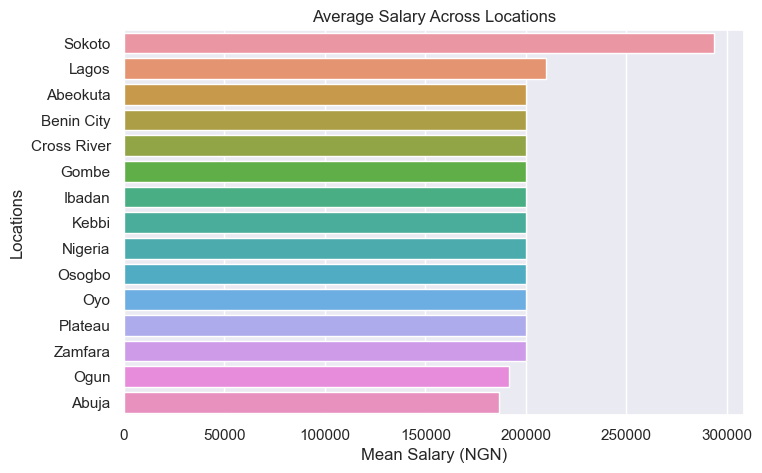

In [16]:
# Bar Plot (Average Salary)
mean_salary = df.groupby('Location')['Salary'].mean().reset_index()
# Sorting the DataFrame by mean salary in descending order
mean_salary = mean_salary.sort_values(by='Salary', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Salary', y='Location', data=mean_salary)
plt.title('Average Salary Across Locations')
plt.xlabel('Mean Salary (NGN)')
plt.ylabel('Locations')
plt.show()

From the bar plot visualization, it's evident that Sokoto has the highest mean salary at __₦293,750.00__. Lagos, despite having a high cost of living, offers a mean salary of __₦210,580.15__.

#### 6. What are the most in-demand skills for these jobs?

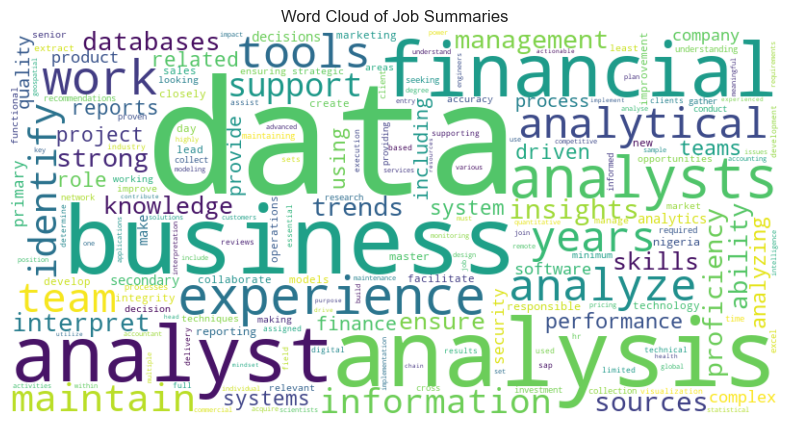

In [17]:
text = ' '.join(df['Summary'])

# Tokenize the text
tokens = word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Summaries')
plt.axis('off')
plt.show()


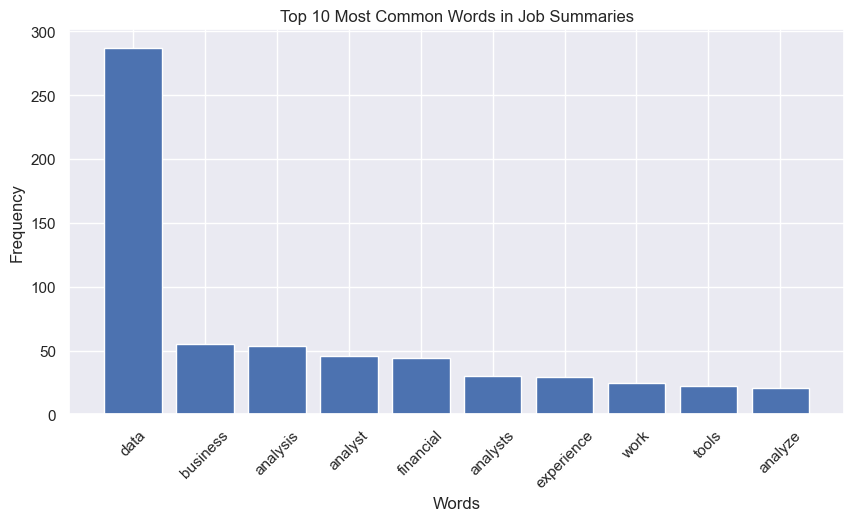

In [18]:
# Plot frequency plot of most common words
common_words = word_freq.most_common(10)
words, frequencies = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words in Job Summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud provides valuable insights into the key themes and skills emphasized in job postings within the dataset. These findings can help job seekers understand the current job market trends and tailor their resumes or skill sets to align with the most sought-after qualifications. Similarly, employers can use this information to craft more targeted job descriptions and recruitment strategies based on prevailing industry demands.

Data: The prominence of the word "data" suggests that many job descriptions emphasize the importance of working with data, indicating a strong demand for roles related to data analysis, data management, or data-driven decision-making.

Business: The frequent appearance of "business" indicates that many positions require skills and knowledge related to understanding business processes, strategies, or operations. This could include roles in business analysis, strategy development, or market research.

Analysis: The word "analysis" underscores the importance of analytical skills in various job roles, indicating a need for professionals capable of interpreting data, conducting market research, or performing quantitative analysis.

Analyst: The inclusion of "analyst" suggests a high demand for individuals with expertise in analyzing data, conducting research, or providing insights to support decision-making processes within organizations.

Financial: The presence of "financial" indicates a focus on roles related to finance, accounting, or financial analysis. This could include positions such as financial analyst, financial planner, or budget analyst.

Tools: The mention of "tools" suggests that many positions require proficiency in specific software tools, platforms, or technologies relevant to the job function. This could include tools for data analysis, business intelligence, or financial modeling.

Analyze: The presence of "analyze" highlights the importance of analytical skills in various job roles, indicating a need for individuals capable of examining data, identifying patterns, and deriving insights to inform decision-making processes.